In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [4]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
cars = pd.read_csv('Cars.csv')

Saving Cars.csv to Cars.csv


In [5]:
cars


,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


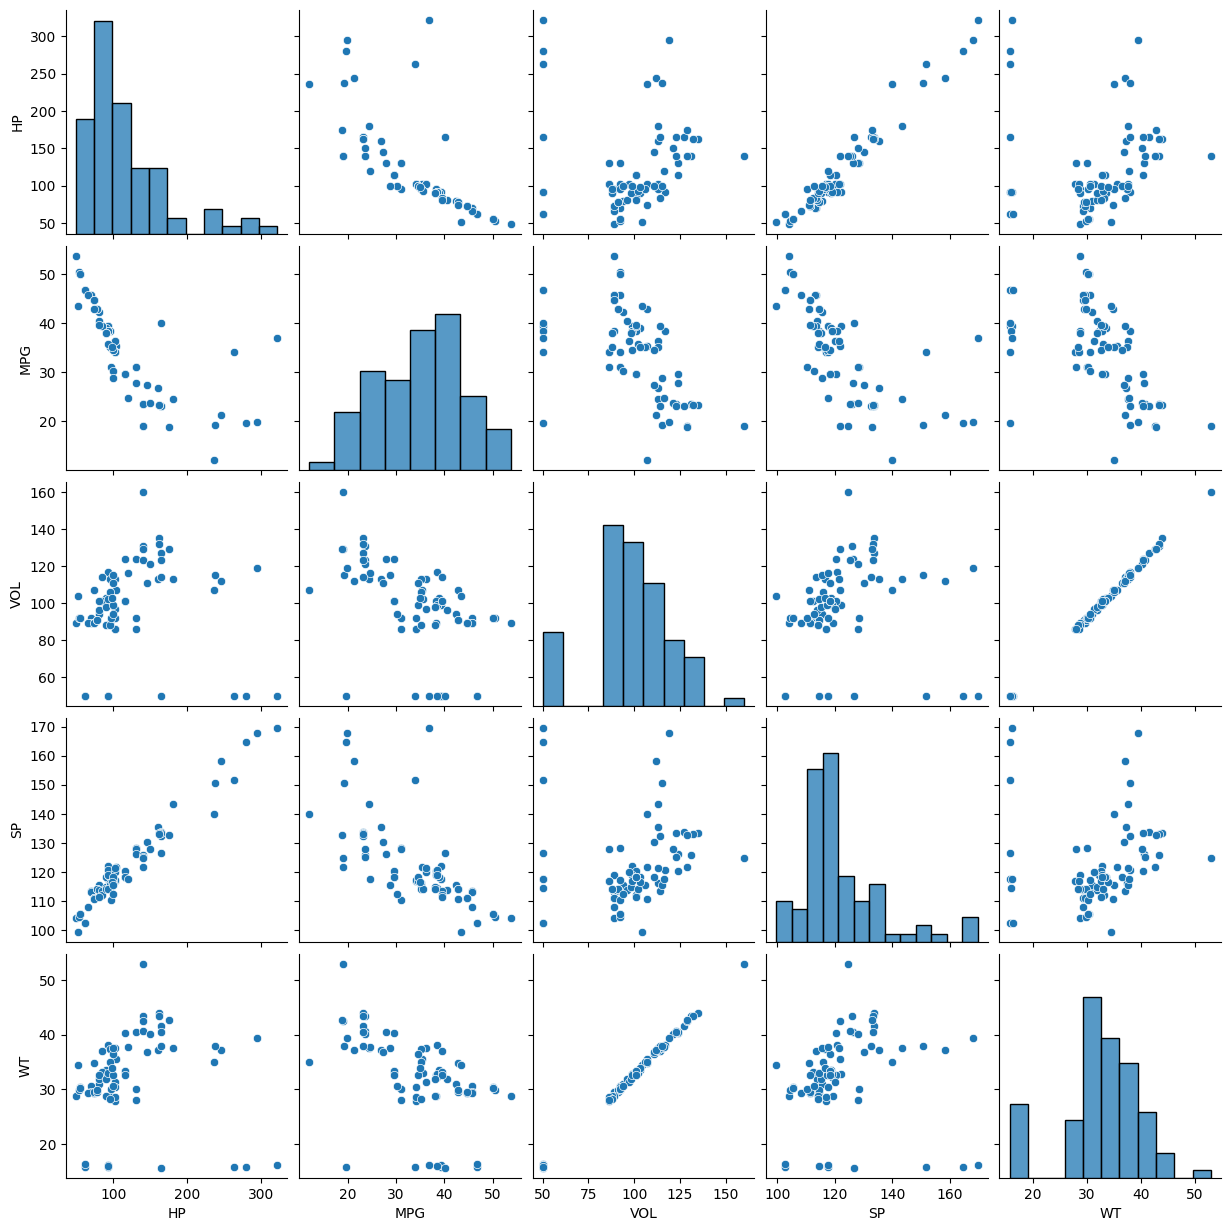

In [6]:
sns.pairplot(cars)

In [7]:
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [8]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


In [9]:
import statsmodels.formula.api as smf
model = smf.ols('MPG~WT+VOL+SP+HP',data = cars).fit()

In [10]:
model.params

,0
Intercept,30.677336
WT,0.400574
VOL,-0.336051
SP,0.395627
HP,-0.205444


In [11]:
#t and p-values
print(model.tvalues, '\n', model.pvalues)

Intercept    2.058841
WT           0.236541
VOL         -0.590970
SP           2.499880
HP          -5.238735
dtype: float64 
 Intercept    0.042936
WT           0.813649
VOL          0.556294
SP           0.014579
HP           0.000001
dtype: float64


In [12]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.7705372737359842, 0.7584602881431413)

In [13]:
ml_v = smf.ols('MPG~VOL',data = cars).fit()
print(ml_v.tvalues, '\n, ml_v.pvalues')

Intercept    14.106056
VOL          -5.541400
dtype: float64 
, ml_v.pvalues


In [14]:
(ml_v.rsquared,ml_v.rsquared_adj)

(0.27990086511227075, 0.27078568618964116)

In [15]:
ml_v = smf.ols('MPG~WT+VOL',data = cars).fit()
print(ml_v.tvalues, '\n, ml_v.pvalues')

Intercept    12.545736
WT            0.489876
VOL          -0.709604
dtype: float64 
, ml_v.pvalues


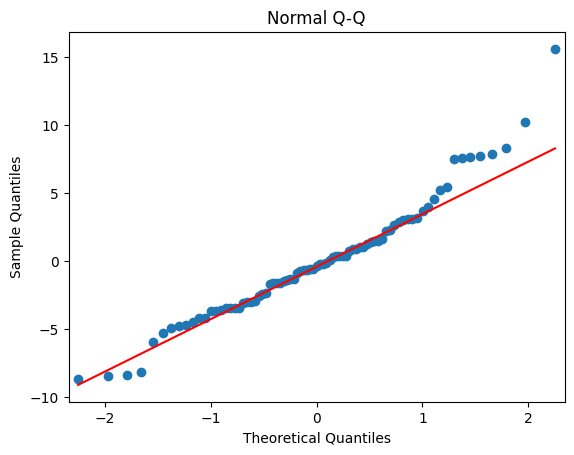

In [29]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid,line = 'q')
plt.title('Normal Q-Q')
plt.show()

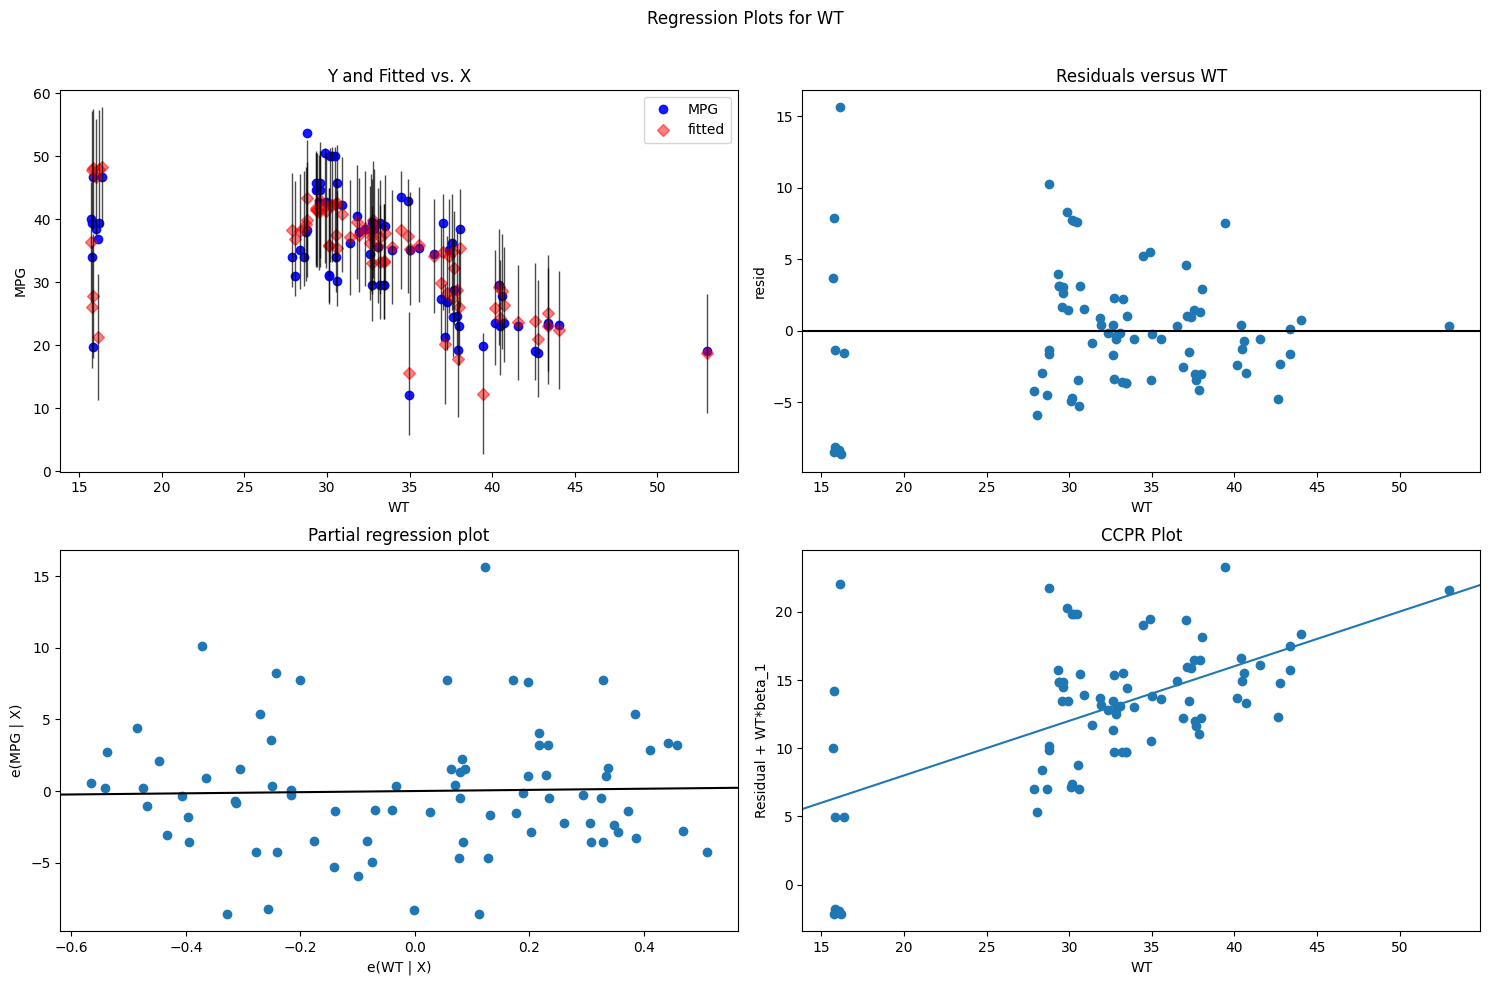

In [31]:
fig = plt.figure(figsize=(15,10))
sm.graphics.plot_regress_exog(model,'WT',fig=fig)
plt.show()

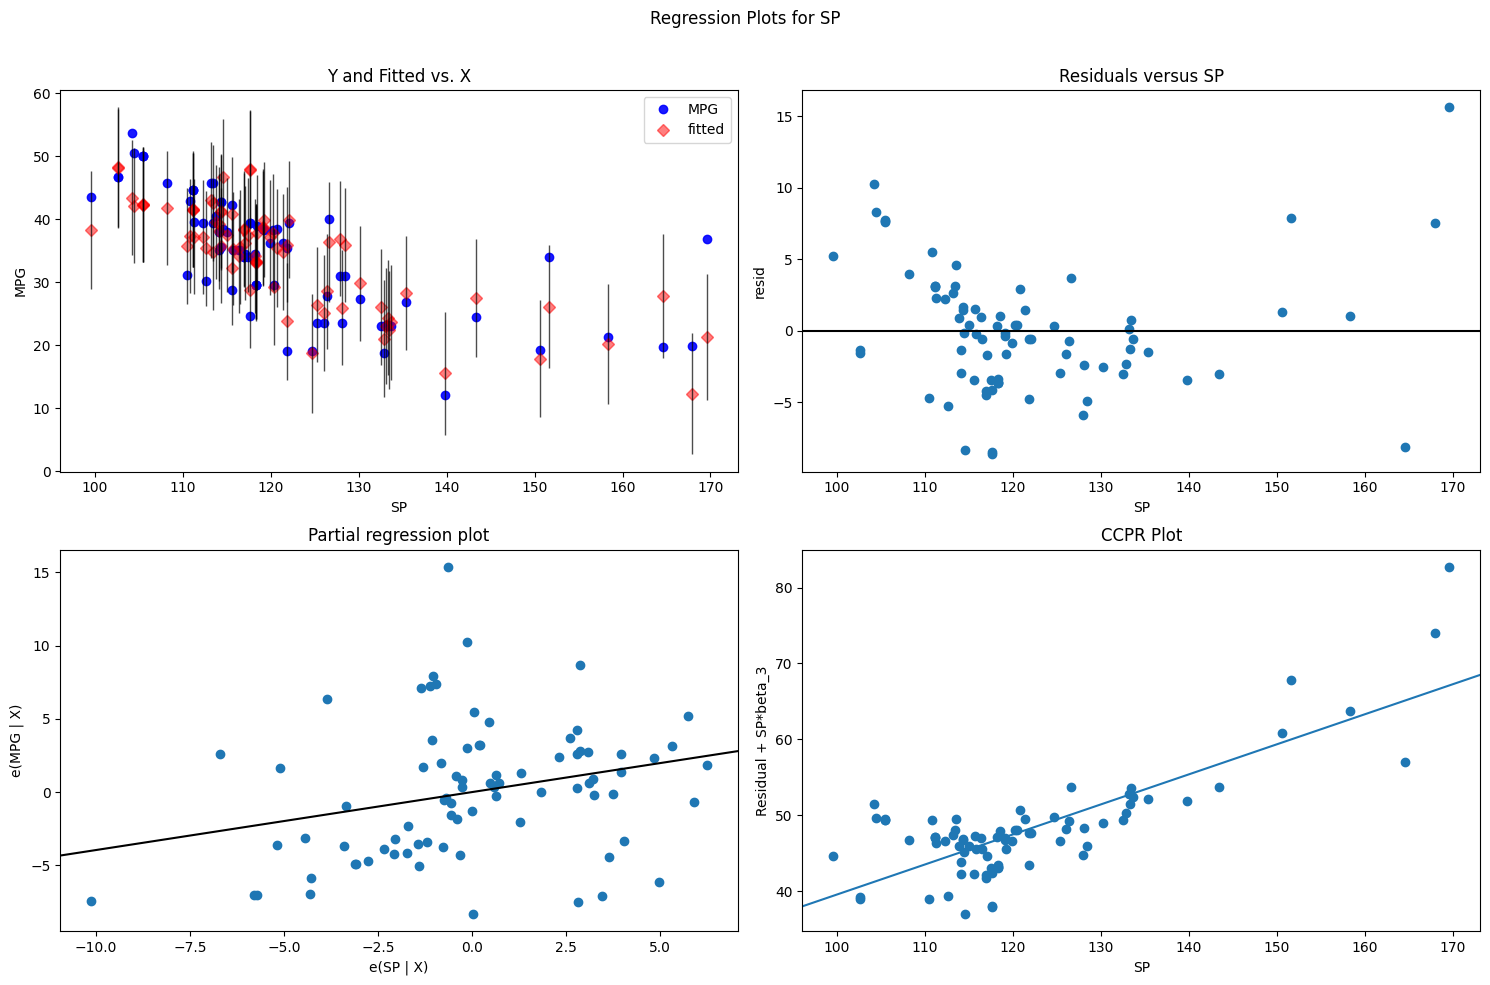

In [30]:
fig = plt.figure(figsize=(15,10))
sm.graphics.plot_regress_exog(model,'SP',fig=fig)
plt.show()

In [25]:
list(np.where(model.resid>10))

[array([ 0, 76])]

In [18]:
def get_standardized_values( vals):
  return (vals-vals.mean())/vals.std()

<function matplotlib.pyplot.show(close=None, block=None)>

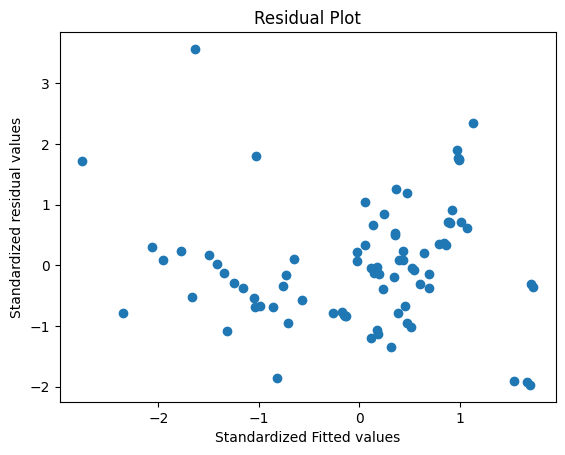

In [19]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show

Cook's Distance

In [36]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

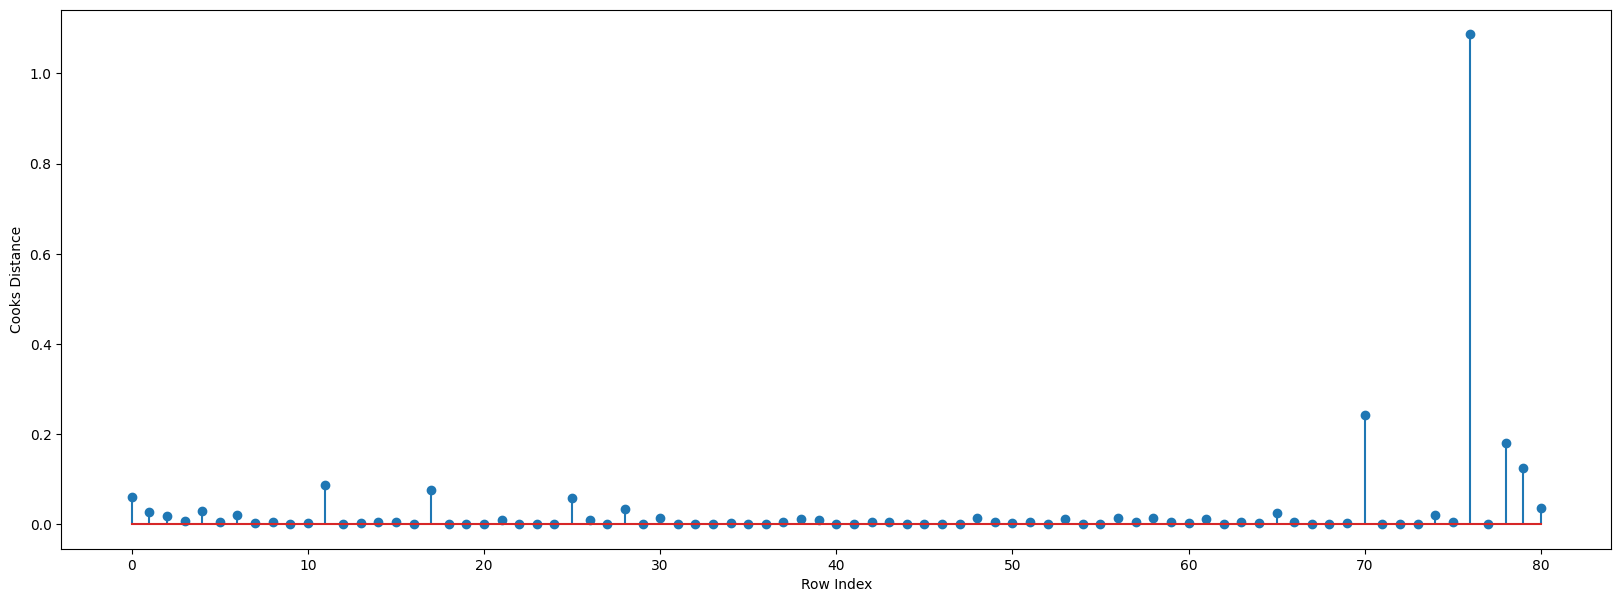

In [38]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(cars)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [39]:
(np.argmax(c),np.max(c))

(76, 1.0865193998179699)

High influence points


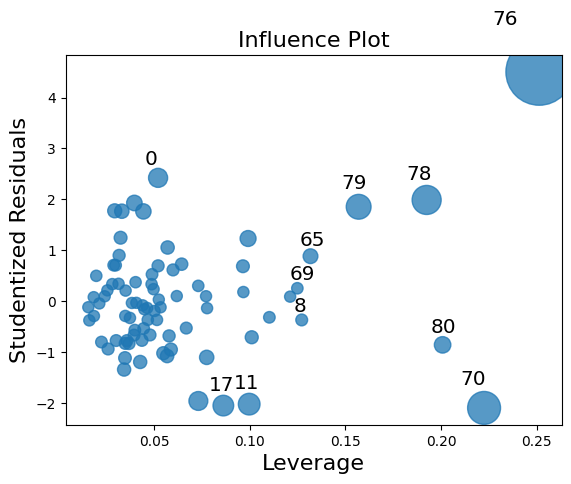

In [41]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [43]:
cars[cars.index.isin([70,76])]

,HP,MPG,VOL,SP,WT
70,280,19.678507,50,164.598513,15.823060
76,322,36.900000,50,169.598513,16.132947


In [44]:
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [45]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
cars = pd.read_csv('Cars.csv')

Saving Cars.csv to Cars (1).csv


In [46]:
car1=cars.drop(cars.index[[70,76]],axis=0).reset_index()

In [47]:
car1=car1.drop(['index'],axis=1)